**README: This notebook contains data exploration for unique number of words.**

In [9]:
import pandas as pd
import numpy as np
import string
import re
from collections import Counter

# Import Data

In [43]:
news_df = pd.read_csv('../data_intermed/news_bert.csv', index_col = 0)
news_df = news_df[news_df['text']!=" "]

In [46]:
news_df.shape

(44271, 10)

In [30]:
news_df['puretext'] = news_df['cleantext'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())
news_df['puretitle'] = news_df['title'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)).lower())

In [31]:
news_df.head(2)

,title,text,subject,date,label,cleantitle,cleantext,source,puretext_wpunc,puretitle_wpunc,puretext,puretitle
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,WASHINGTON (Reuters),the head of a conservative republican faction ...,"as u.s. budget fight looms, republicans flip t...",the head of a conservative republican faction ...,as us budget fight looms republicans flip thei...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,WASHINGTON (Reuters),transgender people will be allowed for the fir...,u.s. military to accept transgender recruits o...,transgender people will be allowed for the fir...,us military to accept transgender recruits on ...


# Percent of Unqiue Words

In [32]:
def numUniqueWords(text):
    return len(Counter(text.split()))

def numWords(text):
    return len(text.split())

In [33]:
news_df['numUniqueWords'] = news_df['puretext'].apply(lambda x: numUniqueWords(x))
news_df['numWords'] = news_df['puretext'].apply(lambda x: numWords(x))+1
news_df['percUniqueWords'] = news_df['numUniqueWords']/news_df['numWords']

In [36]:
news_df.groupby('label').median()

,numUniqueWords,numWords,percUniqueWords
label,,,
fake,205,367,0.559028
true,200,357,0.573676


In [37]:
news_df.groupby('label').mean()

,numUniqueWords,numWords,percUniqueWords
label,,,
fake,223.152789,433.299016,0.576987
true,205.392370,382.250140,0.595840


In [38]:
import matplotlib.pyplot as plt
# https://matplotlib.org/3.1.1/gallery/statistics/histogram_multihist.html

In [39]:
# set for histograms
percUniqueWords = news_df.percUniqueWords.values
labels = news_df.label.values
y = np.zeros(labels.shape)
y[labels == 'fake'] = 1

percUniqueWordsList = []
percUniqueWordsTrue = percUniqueWords[labels=="true"]
percUniqueWordsFake = percUniqueWords[labels=="fake"]
percUniqueWordsList.append(percUniqueWordsTrue)
percUniqueWordsList.append(percUniqueWordsFake)

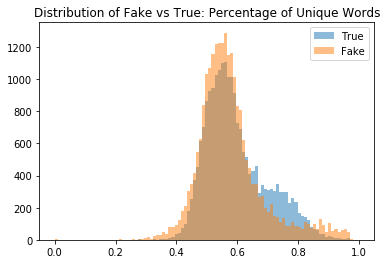

In [40]:
# plot histogram method 1
bins = np.linspace(0, 1, 100)

plt.hist(percUniqueWordsTrue, bins, alpha=0.5, label='True')
plt.hist(percUniqueWordsFake, bins, alpha=0.5, label='Fake')
plt.title('Distribution of Fake vs True: Percentage of Unique Words')
plt.legend(loc='upper right')
plt.show()